 Práctica de Visión por Computadora para Robótica con scikit-image

## Objetivo

Desarrollar habilidades en procesamiento de imágenes aplicadas a robótica usando scikit-image, simulando tareas típicas que un robot necesita realizar.

## Configuración Inicial

```python
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, measure, morphology, segmentation
from skimage.color import rgb2gray, rgb2hsv
from skimage.feature import canny, corner_harris, corner_peaks
from skimage.transform import hough_line, hough_line_peaks, hough_circle
from skimage.util import random_noise
import cv2  # Para algunas funciones complementarias
```

---

## Ejercicio 1: Detección de Objetos por Color (Clasificación de Piezas)

**Escenario**: Un robot debe clasificar piezas de diferentes colores en una banda transportadora.

**Tareas**:

1. Carga una imagen con objetos de diferentes colores
2. Convierte a espacio de color HSV
3. Crea máscaras para detectar objetos rojos, azules y verdes
4. Cuenta el número de objetos de cada color
5. Calcula el centroide de cada objeto

```python
def detectar_objetos_por_color(imagen):
    """
    Detecta y clasifica objetos por color
    """
    # Tu código aquí
    pass

# Imagen de prueba (puedes usar una imagen sintética o real)
# imagen = io.imread('piezas_colores.jpg')
```

**Criterios de evaluación**:

- Precisión en la detección (>90%)
- Robustez ante variaciones de iluminación
- Cálculo correcto de centroides

---

{'rojo': {'conteo': 2, 'centroides': [(np.float64(507.57006874669486), np.float64(745.690273766424)), (np.float64(510.15822971549), np.float64(514.900779768177))]}, 'azul': {'conteo': 1, 'centroides': [(np.float64(495.8976624000961), np.float64(267.8161168199027))]}, 'verde': {'conteo': 2, 'centroides': [(np.float64(507.0418809698751), np.float64(1246.8729692219772)), (np.float64(508.91105421811125), np.float64(1003.5216170458768))]}}


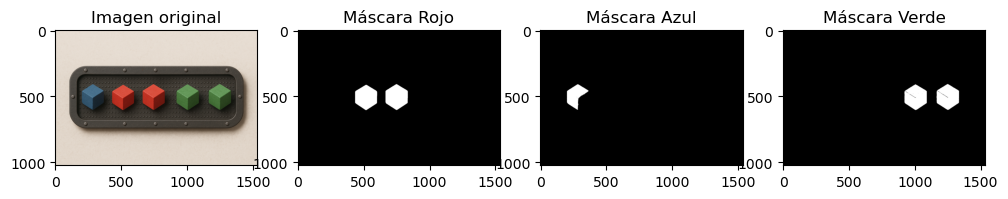

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, measure, morphology
from skimage.color import rgb2hsv

def detectar_objetos_por_color(imagen):
    """
    Detecta y clasifica objetos por color (rojo, azul, verde)
    """
    # Convertir a HSV
    hsv = rgb2hsv(imagen)

    # Definir rangos de color en HSV
    # Nota: skimage usa valores normalizados [0,1], no [0,179] como OpenCV
    rojo_mask = ((hsv[:,:,0] < 0.05) | (hsv[:,:,0] > 0.95)) & (hsv[:,:,1] > 0.3) & (hsv[:,:,2] > 0.2)
    azul_mask = (hsv[:,:,0] > 0.55) & (hsv[:,:,0] < 0.75) & (hsv[:,:,1] > 0.3) & (hsv[:,:,2] > 0.2)
    verde_mask = (hsv[:,:,0] > 0.25) & (hsv[:,:,0] < 0.45) & (hsv[:,:,1] > 0.3) & (hsv[:,:,2] > 0.2)

    # Limpiar ruido morfológicamente
    rojo_mask = morphology.remove_small_objects(rojo_mask, 100)
    azul_mask = morphology.remove_small_objects(azul_mask, 100)
    verde_mask = morphology.remove_small_objects(verde_mask, 100)

    resultados = {}
    for color, mask in zip(["rojo", "azul", "verde"], [rojo_mask, azul_mask, verde_mask]):
        etiquetas = measure.label(mask)
        props = measure.regionprops(etiquetas)

        resultados[color] = {
            "conteo": len(props),
            "centroides": [p.centroid for p in props]
        }

    return resultados, [rojo_mask, azul_mask, verde_mask]

# -------------------------
# Prueba con la imagen
imagen = io.imread("ChatGPT Image Sep 18, 2025, 07_32_39 PM.png")
resultados, masks = detectar_objetos_por_color(imagen)

print(resultados)

# Visualización
fig, axes = plt.subplots(1, 4, figsize=(12,4))
axes[0].imshow(imagen)
axes[0].set_title("Imagen original")

for ax, mask, color in zip(axes[1:], masks, ["Rojo", "Azul", "Verde"]):
    ax.imshow(mask, cmap="gray")
    ax.set_title(f"Máscara {color}")

plt.show()


## Ejercicio 2: Navegación por Líneas (Seguimiento de Trayectoria)

**Escenario**: Un robot móvil debe seguir una línea en el suelo para navegar.

**Tareas**:

1. Detecta líneas usando la transformada de Hough
2. Calcula el ángulo de la línea principal
3. Determina si el robot debe girar izquierda/derecha
4. Estima la distancia al centro de la línea

```python
def seguir_linea(imagen):
    """
    Procesa imagen para seguimiento de línea
    Retorna: ángulo_giro, distancia_centro
    """
    # Preprocesamiento
    gray = rgb2gray(imagen)

    # Detección de bordes
    edges = canny(gray, sigma=2, low_threshold=0.1, high_threshold=0.2)

    # Tu código para Hough Transform aquí

    return angulo_giro, distancia_centro
```

**Reto adicional**: Maneja intersecciones y bifurcaciones.

---

Ángulo de la línea principal: -90.00°
Distancia al centro: -1772.00 píxeles


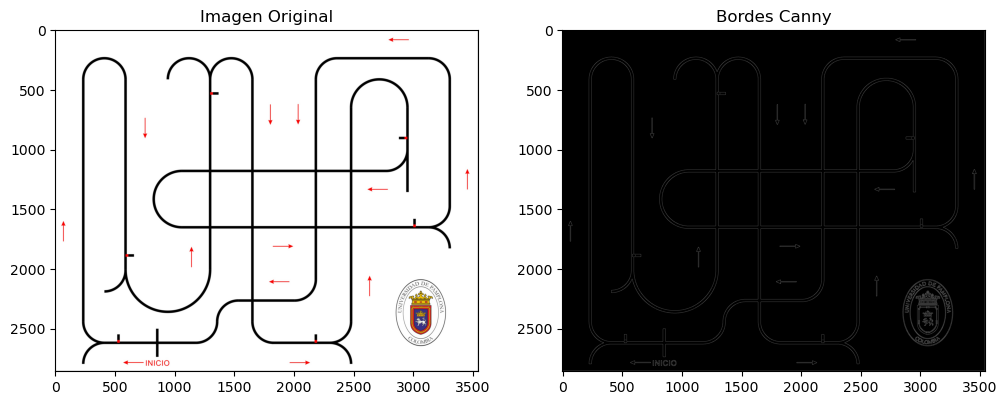

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks

def seguir_linea(imagen):
    """
    Procesa imagen para seguimiento de línea
    Retorna: ángulo_giro, distancia_centro
    """
    gray = rgb2gray(imagen)

    # 1. Detección de bordes (línea negra sobre blanco)
    edges = canny(gray, sigma=2, low_threshold=0.1, high_threshold=0.3)

    # 2. Transformada de Hough
    hspace, angles, dists = hough_line(edges)

    # 3. Selección de la línea principal
    accum, angle, dist = next(zip(*hough_line_peaks(hspace, angles, dists)))

    # Convertimos ángulo de radianes a grados
    angulo_giro = np.rad2deg(angle)

    # 4. Distancia al centro de la línea (comparada con el centro de la imagen)
    centro_imagen = imagen.shape[1] // 2
    distancia_centro = dist - centro_imagen

    return angulo_giro, distancia_centro, edges, (angle, dist)


# Cargar imagen de la pista
imagen = io.imread("https://www.unipamplona.edu.co/unipamplona/portalIG/home_88/recursos/01general/04112013/pista_ava.jpg")  # Descárgala y colócala en tu carpeta de trabajo
angulo, dist_centro, edges, (angle, dist) = seguir_linea(imagen)

# Visualización
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imagen)
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(edges, cmap="gray")
plt.title("Bordes Canny")

print(f"Ángulo de la línea principal: {angulo:.2f}°")
print(f"Distancia al centro: {dist_centro:.2f} píxeles")


## Ejercicio 3: Detección y Medición de Objetos (Control de Calidad)

**Escenario**: Un robot industrial debe medir dimensiones de piezas manufacturadas.

**Tareas**:

1. Segmenta objetos del fondo
2. Calcula área, perímetro y dimensiones principales
3. Detecta defectos (agujeros, irregularidades)
4. Clasifica piezas como "aprobadas" o "defectuosas"

```python
def control_calidad(imagen, tolerancia_area=0.1):
    """
    Analiza piezas para control de calidad
    """
    # Segmentación
    gray = rgb2gray(imagen)
    thresh = filters.threshold_otsu(gray)
    binary = gray > thresh

    # Análisis morfológico
    cleaned = morphology.remove_small_objects(binary, min_size=100)

    # Tu código para mediciones aquí

    return resultados_medicion
```

**Métricas a calcular**:

- Área en píxeles y mm²
- Relación aspecto (largo/ancho)
- Circularidad: 4π×área/perímetro²
- Número de agujeros

---


{'pieza': 1, 'area_px': np.float64(641176.0), 'area_mm2': np.float64(6411.76), 'perimetro': np.float64(19432.83), 'aspect_ratio': 2.65, 'circularidad': np.float64(0.021), 'agujeros': np.int64(1907), 'clasificacion': 'defectuosa'}


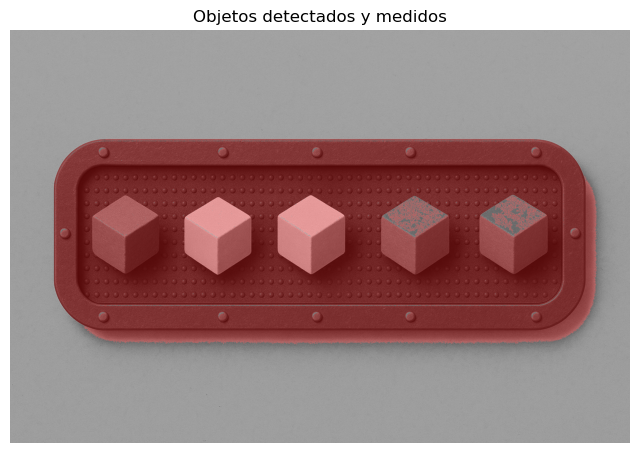

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, measure, morphology
from skimage.color import rgb2gray, label2rgb

def control_calidad(imagen, tolerancia_area=0.1, mm_por_pixel=0.1):
    """
    Analiza piezas para control de calidad en la imagen.
    Retorna lista de mediciones y etiquetas.
    """
    resultados = []

    # 1. Segmentación (umbral automático de Otsu)
    gray = rgb2gray(imagen)
    thresh = filters.threshold_otsu(gray)
    binary = gray < thresh   # piezas oscuras sobre fondo claro
    cleaned = morphology.remove_small_objects(binary, min_size=500)

    # 2. Etiquetado de regiones
    labels = measure.label(cleaned)
    props = measure.regionprops(labels)

    # 3. Medición por objeto
    area_ref = np.median([p.area for p in props]) if props else 0

    for i, prop in enumerate(props, start=1):
        area_px = prop.area
        area_mm2 = area_px * (mm_por_pixel**2)

        perimetro = prop.perimeter
        minr, minc, maxr, maxc = prop.bbox
        ancho = maxc - minc
        alto = maxr - minr
        aspect_ratio = ancho / alto if alto > 0 else 0

        # Circularidad
        circularidad = (4 * np.pi * area_px) / (perimetro**2) if perimetro > 0 else 0

        # Agujeros detectados (Euler number)
        num_agujeros = 1 - prop.euler_number

        # Clasificación por área y agujeros
        dentro_tolerancia = (
            abs(area_px - area_ref) / area_ref < tolerancia_area
        ) if area_ref > 0 else False

        clasificacion = "aprobada" if dentro_tolerancia and num_agujeros == 0 else "defectuosa"

        resultados.append({
            "pieza": i,
            "area_px": area_px,
            "area_mm2": round(area_mm2, 2),
            "perimetro": round(perimetro, 2),
            "aspect_ratio": round(aspect_ratio, 3),
            "circularidad": round(circularidad, 3),
            "agujeros": num_agujeros,
            "clasificacion": clasificacion
        })

    return resultados, labels


# --- Uso con tu imagen ---
imagen = io.imread("ChatGPT Image Sep 18, 2025, 07_32_39 PM.png")

resultados, labels = control_calidad(imagen)

# Mostrar resultados en consola
for r in resultados:
    print(r)

# Visualización
plt.figure(figsize=(8,6))
plt.imshow(label2rgb(labels, image=imagen, bg_label=0))
plt.title("Objetos detectados y medidos")
plt.axis("off")
plt.show()


## Ejercicio 4: Reconocimiento de Formas Geométricas

**Escenario**: Un robot debe clasificar y manipular objetos según su forma.

**Tareas**:

1. Detecta contornos de objetos
2. Clasifica formas: círculo, cuadrado, triángulo, rectángulo
3. Calcula orientación para agarre robótico
4. Determina puntos de agarre óptimos

```python
def clasificar_formas(imagen):
    """
    Clasifica objetos por su forma geométrica
    """
    # Detección de contornos
    gray = rgb2gray(imagen)
    edges = canny(gray, sigma=1)

    # Análisis de forma
    contours = measure.find_contours(edges, 0.5)

    formas_detectadas = []

    for contour in contours:
        # Tu código para clasificación aquí
        # Usa aproximación poligonal, análisis de curvatura, etc.
        pass

    return formas_detectadas
```

**Algoritmos sugeridos**:

- Aproximación de Douglas-Peucker
- Análisis de momentos de Hu
- Descriptores de Fourier

---

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, feature, measure, morphology
from skimage.measure import approximate_polygon, regionprops, label
from scipy.ndimage import binary_fill_holes  # <--- Agrega esto

from skimage import io
imagen = io.imread("figuras.png")
if imagen.shape[-1] == 4:
    imagen = imagen[..., :3]

def clasificar_formas(imagen):
    """
    Clasifica objetos geométricos en la imagen.
    Detecta orientación y puntos de agarre.
    """
    gray = color.rgb2gray(imagen)
    edges = feature.canny(gray, sigma=2)

    # Rellenar regiones cerradas
    filled = binary_fill_holes(edges)
    labeled = label(filled)
    props = regionprops(labeled)

    formas_detectadas = []

    for region in props:
        # Contorno aproximado
        coords = region.coords
        contour = approximate_polygon(coords, tolerance=3)

        # Clasificación por número de vértices
        num_vertices = len(contour)
        if num_vertices == 3:
            forma = "Triángulo"
        elif num_vertices == 4:
            minr, minc, maxr, maxc = region.bbox
            ar = (maxr - minr) / (maxc - minc)
            if 0.9 < ar < 1.1:
                forma = "Cuadrado"
            else:
                forma = "Rectángulo"
        else:
            area = region.area
            perimetro = region.perimeter
            circularidad = 4 * np.pi * area / (perimetro ** 2 + 1e-6)
            if circularidad > 0.7:
                forma = "Círculo"
            else:
                forma = "Polígono"

        # Orientación en radianes
        orientacion = region.orientation

        # Puntos de agarre: extremos del bounding box
        minr, minc, maxr, maxc = region.bbox
        puntos_agarre = [(minr, minc), (maxr, maxc)]

        formas_detectadas.append({
            "forma": forma,
            "vertices": num_vertices,
            "orientacion": orientacion,
            "agarre": puntos_agarre
        })

    return formas_detectadas

formas = clasificar_formas(imagen)

for f in formas:
    print(f)


{'forma': 'Polígono', 'vertices': 826, 'orientacion': 0.002655185462327817, 'agarre': [(41, 7), (469, 89)]}
{'forma': 'Polígono', 'vertices': 820, 'orientacion': 0.0033701511725398757, 'agarre': [(46, 94), (473, 176)]}
{'forma': 'Polígono', 'vertices': 806, 'orientacion': -0.005982724343271028, 'agarre': [(48, 183), (475, 266)]}
{'forma': 'Polígono', 'vertices': 6, 'orientacion': -0.0015969089118609856, 'agarre': [(51, 275), (478, 353)]}
{'forma': 'Círculo', 'vertices': 124, 'orientacion': 1.5615303185688303, 'agarre': [(56, 281), (122, 352)]}
{'forma': 'Círculo', 'vertices': 126, 'orientacion': 1.4912216198155954, 'agarre': [(126, 281), (193, 352)]}
{'forma': 'Círculo', 'vertices': 124, 'orientacion': 1.5157886478702738, 'agarre': [(196, 281), (262, 352)]}
{'forma': 'Círculo', 'vertices': 126, 'orientacion': -1.5655883002180118, 'agarre': [(266, 281), (332, 351)]}
{'forma': 'Círculo', 'vertices': 128, 'orientacion': -1.4673405400742918, 'agarre': [(336, 280), (403, 351)]}
{'forma': 'C

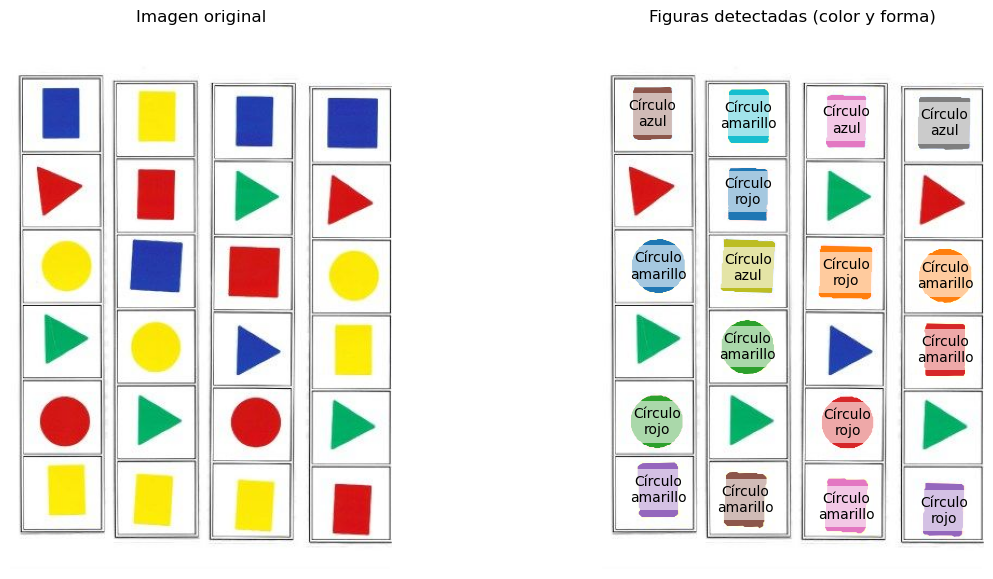

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage.measure import approximate_polygon, regionprops, label
from scipy.ndimage import binary_fill_holes
from skimage import io

imagen = io.imread("figuras.png")
if imagen.shape[-1] == 4:
    imagen = imagen[..., :3]

def crear_mascara_color(imagen, color_name):
    hsv = color.rgb2hsv(imagen)
    if color_name == "rojo":
        mask = ((hsv[:,:,0] < 0.05) | (hsv[:,:,0] > 0.95)) & (hsv[:,:,1] > 0.3) & (hsv[:,:,2] > 0.2)
    elif color_name == "azul":
        mask = (hsv[:,:,0] > 0.55) & (hsv[:,:,0] < 0.75) & (hsv[:,:,1] > 0.3) & (hsv[:,:,2] > 0.2)
    elif color_name == "verde":
        mask = (hsv[:,:,0] > 0.25) & (hsv[:,:,0] < 0.45) & (hsv[:,:,1] > 0.3) & (hsv[:,:,2] > 0.2)
    elif color_name == "amarillo":
        mask = (hsv[:,:,0] > 0.12) & (hsv[:,:,0] < 0.18) & (hsv[:,:,1] > 0.3) & (hsv[:,:,2] > 0.2)
    else:
        mask = np.zeros(hsv.shape[:2], dtype=bool)
    return mask

def clasificar_formas_colores(imagen):
    colores = ["rojo", "azul", "verde", "amarillo"]
    formas_detectadas = []
    for color_name in colores:
        mask = crear_mascara_color(imagen, color_name)
        mask = binary_fill_holes(mask)
        labeled = label(mask)
        props = regionprops(labeled)
        for region in props:
            coords = region.coords
            contour = approximate_polygon(coords, tolerance=1)  # Menor tolerancia
            num_vertices = len(contour) - 1  # El último punto es igual al primero

            if num_vertices == 3:
                forma = "Triángulo"
            elif num_vertices == 4:
                minr, minc, maxr, maxc = region.bbox
                ar = (maxr - minr) / (maxc - minc)
                if 0.8 < ar < 1.2:
                    forma = "Cuadrado"
                else:
                    forma = "Rectángulo"
            elif num_vertices > 6:
                area = region.area
                perimetro = region.perimeter
                circularidad = 4 * np.pi * area / (perimetro ** 2 + 1e-6)
                if circularidad > 0.7:
                    forma = "Círculo"
                else:
                    forma = "Polígono"
            else:
                forma = "Polígono"

            orientacion = region.orientation
            minr, minc, maxr, maxc = region.bbox
            puntos_agarre = [(minr, minc), (maxr, maxc)]
            formas_detectadas.append({
                "color": color_name,
                "forma": forma,
                "vertices": num_vertices,
                "orientacion": orientacion,
                "agarre": puntos_agarre,
                "contorno": contour
            })
    return formas_detectadas

formas = clasificar_formas_colores(imagen)

# Visualización
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(imagen)
ax[0].set_title("Imagen original")
ax[0].axis("off")

ax[1].imshow(imagen)
for f in formas:
    if f["forma"] in ["Triángulo", "Cuadrado", "Rectángulo", "Círculo"]:
        cont = f["contorno"]
        ax[1].plot(cont[:, 1], cont[:, 0], linewidth=2)
        y, x = np.mean(cont, axis=0)
        ax[1].text(x, y, f'{f["forma"]}\n{f["color"]}', color='black', fontsize=10, ha='center', va='center',
                   bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax[1].set_title("Figuras detectadas (color y forma)")
ax[1].axis("off")
plt.show()